# Import libraries `

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [4]:
df=pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\CSV Files\Fish (1).csv')

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Visualize the Dataset

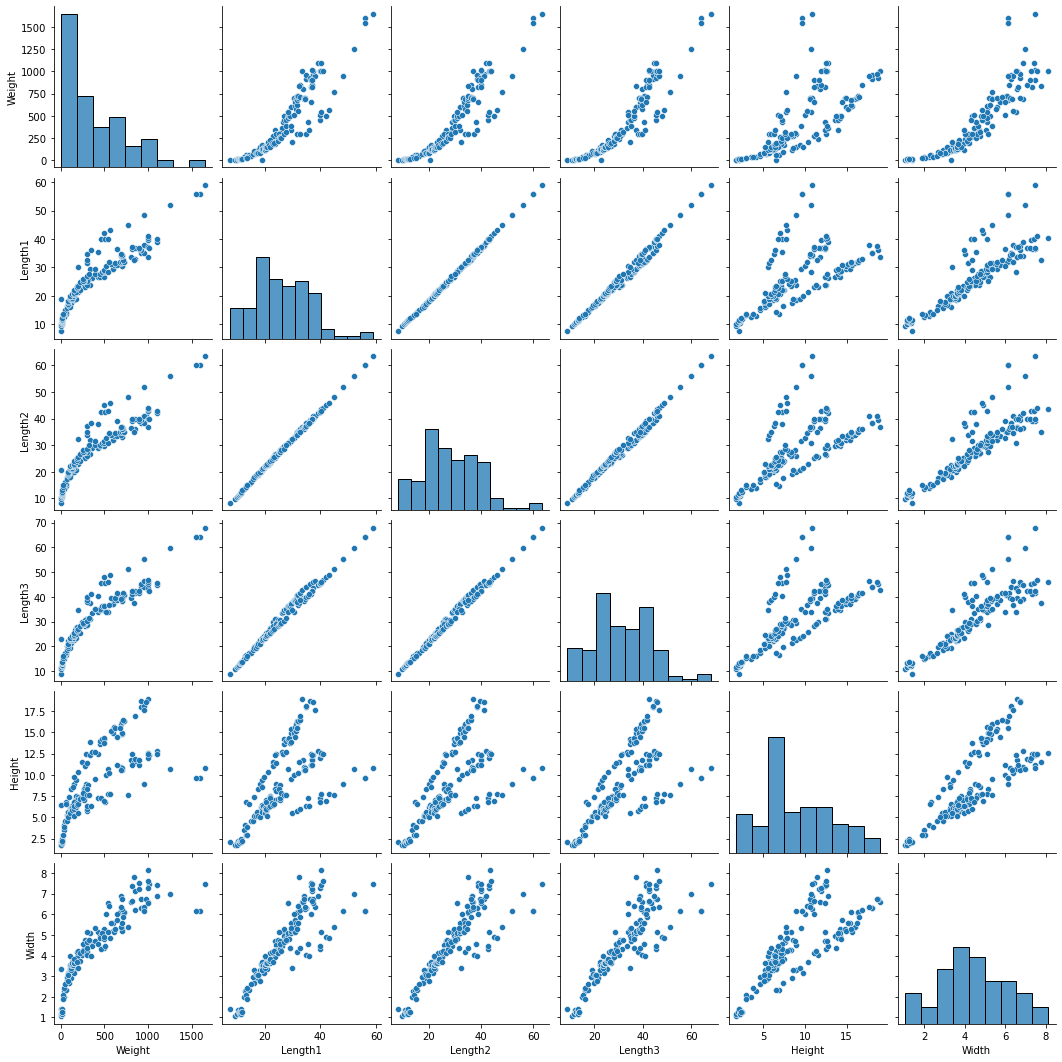

In [31]:
sns.pairplot(df)
plt.show()

## Select Dependent and Independent Variable

In [38]:
Y=df.Weight.values.reshape(-1,1) #Dependent Variable
X=df.Width.values.reshape(-1,1)  #INdependent Variable

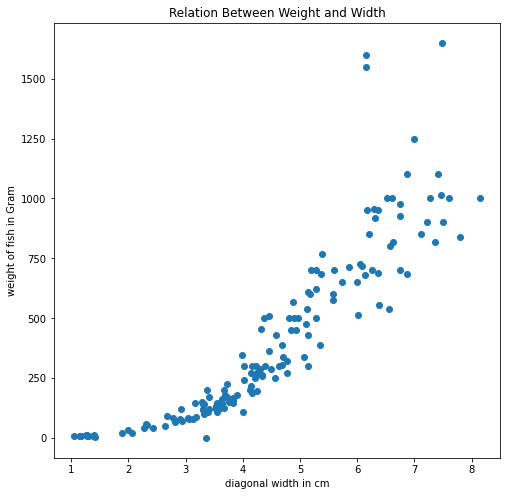

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(X,Y)
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")
plt.title("Relation Between Weight and Width")
plt.show()

In [40]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

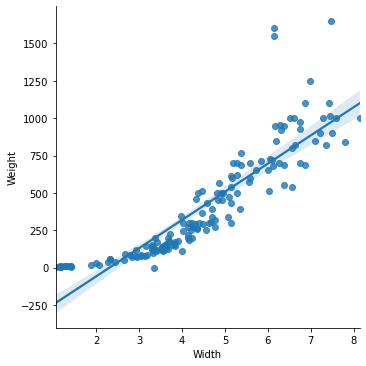

In [41]:
plt.figure(figsize=(8,8))
sns.lmplot('Width','Weight',data=df)
plt.show()

# Polynomial transformation and Model Trainnig

In [91]:
#Convert X to Polynomial

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [115]:
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
poly_model=LinearRegression()

In [116]:
poly_model.fit(X_poly,Y)

LinearRegression()

# Prediction

In [117]:
Y_hat=poly_model.predict(X_poly)

Y_hat=pd.DataFrame(Y_hat)
Y=pd.DataFrame(Y)

In [118]:
df1=pd.concat([Y,Y_hat],axis=1)
df2=compare.rename(columns={0:'Y_Actual',1:'Y_Predicted'})

In [119]:
df2

,Y_Actual,Y_Actual
0,242.0,248.800537
1,290.0,317.096507
2,340.0,416.044795
3,363.0,354.461516
4,430.0,530.984979
...,...,...
154,12.2,11.299563
155,13.4,26.984658
156,12.2,28.834988
157,19.7,-21.687722


# Visualise the train Model

Text(0.5, 1.0, 'Train Polynomial Model')

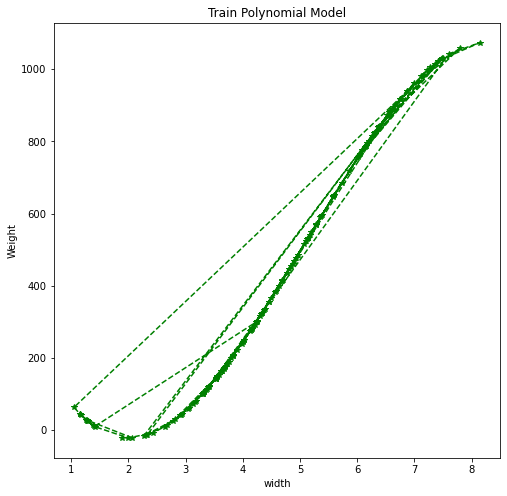

In [128]:
plt.figure(figsize=(8,8))
plt.plot(X,poly_model.predict(X_poly),'--g*')
plt.xlabel('width')
plt.ylabel('Weight')
plt.title("Train Polynomial Model")

Text(0.5, 1.0, 'Train Polynomial Model')

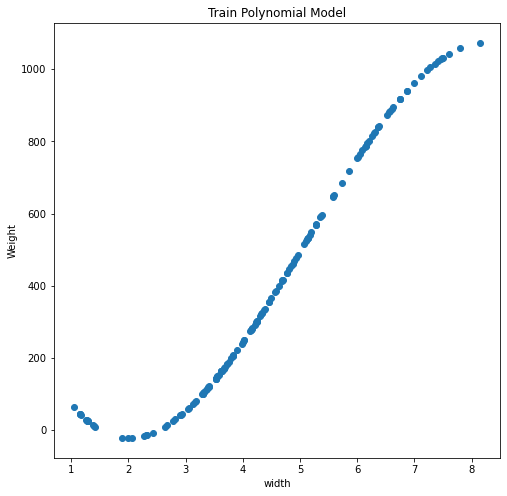

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(X,poly_model.predict(X_poly))
plt.xlabel('width')
plt.ylabel('Weight')
plt.title("Train Polynomial Model")